In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')


%matplotlib inline

In [2]:
df = pd.read_csv("bank_marketing_data.csv")

In [3]:
df.shape

(41188, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Check if there are duplicates and delete duplicates if needed.

In [6]:
df.duplicated().sum()

12

In [7]:
df.drop_duplicates(keep="first", inplace=True)

In [8]:
assert df.shape[0]==41188-12

### Check if there are missing values

In [9]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Analysis of Categorical Predictors

In [10]:
cate_predictors=["job", "marital", "education", "default", "housing", "loan", "contact", "month", 
                 "day_of_week", "poutcome"]

In [11]:
for key in cate_predictors:
    print(f"{key} has values: \n {df[key].unique()}")
    print(f"Count different values in {key}:\n {df[key].value_counts()}")
    print("------------------------------------------------------------")

job has values: 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Count different values in job:
 admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
------------------------------------------------------------
marital has values: 
 ['married' 'single' 'divorced' 'unknown']
Count different values in marital:
 married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
------------------------------------------------------------
education has values: 
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Count different values in education:
 u

### marital, contact, housing, loan

In [12]:
df.default.replace("yes", "other", inplace=True)
df.default.replace("unknown", "other", inplace=True)

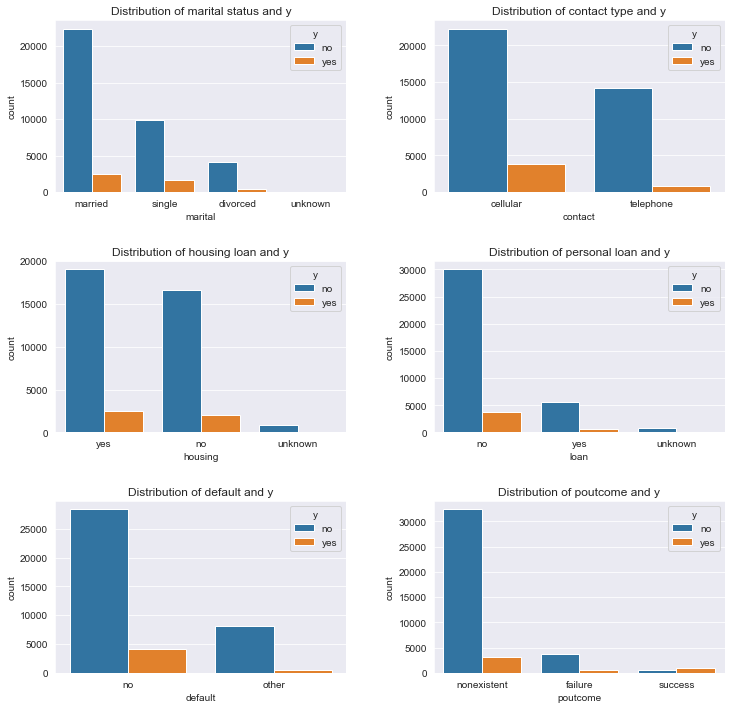

In [13]:
fig, ax= plt.subplots(3,2, figsize=(12,12))
sns.countplot(x="marital", hue="y",data=df, order=df.marital.value_counts().index, ax=ax[0][0])
ax[0][0].set_title("Distribution of marital status and y")
sns.countplot(x="contact", hue="y",data=df, order=df.contact.value_counts().index, ax=ax[0][1])
ax[0][1].set_title("Distribution of contact type and y")
sns.countplot(x="housing", hue="y",data=df, order=df.housing.value_counts().index, ax=ax[1][0])
ax[1][0].set_title("Distribution of housing loan and y")
sns.countplot(x="loan", hue="y",data=df, order=df.loan.value_counts().index, ax=ax[1][1])
ax[1][1].set_title("Distribution of personal loan and y")
sns.countplot(x="default", hue="y",data=df, order=df.default.value_counts().index, ax=ax[2][0])
ax[2][0].set_title("Distribution of default and y")
sns.countplot(x="poutcome", hue="y",data=df, order=df.poutcome.value_counts().index, ax=ax[2][1])
ax[2][1].set_title("Distribution of poutcome and y")
plt.subplots_adjust(wspace=0.3, hspace=0.4);

In [14]:
df.default.value_counts()

no       32577
other     8599
Name: default, dtype: int64

### job, education

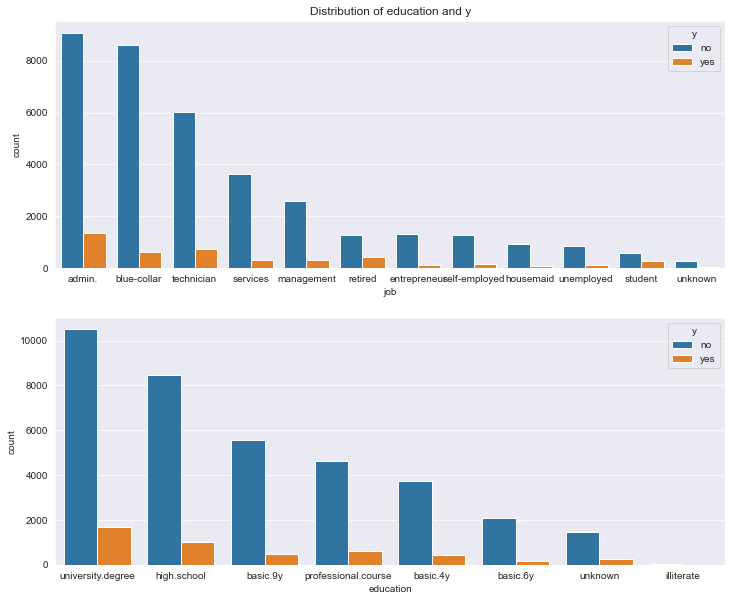

In [15]:
fig, ax= plt.subplots(2,1, figsize=(12,10))
sns.countplot(x="job", hue="y",data=df, order=df.job.value_counts().index, ax=ax[0])
ax[0].set_title("Distribution of job and y")
sns.countplot(x="education", hue="y",data=df, order=df.education.value_counts().index, ax=ax[1])
ax[0].set_title("Distribution of education and y");

### month, day_of_week

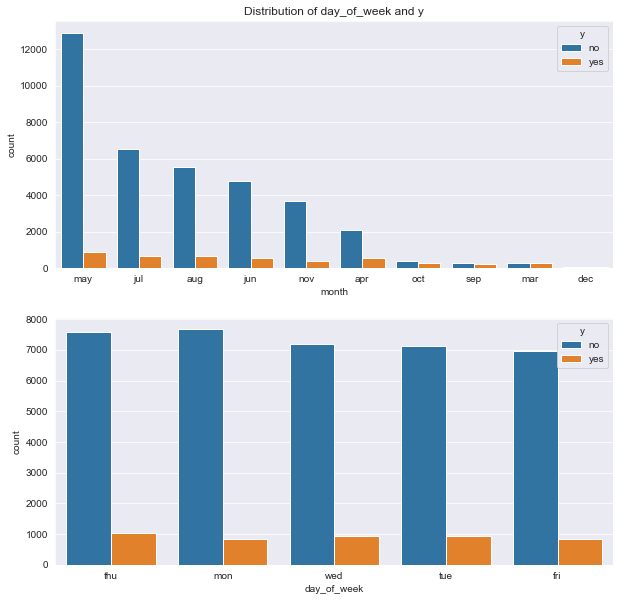

In [16]:
fig, ax= plt.subplots(2,1, figsize=(10,10))
sns.countplot(x="month", hue="y",data=df, order=df.month.value_counts().index, ax=ax[0])
ax[0].set_title("Distribution of month and y")
sns.countplot(x="day_of_week", hue="y",data=df, order=df.day_of_week.value_counts().index, ax=ax[1])
ax[0].set_title("Distribution of day_of_week and y");

## Numerical predictors

In [17]:
num_predictors=['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [18]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Age, campaign

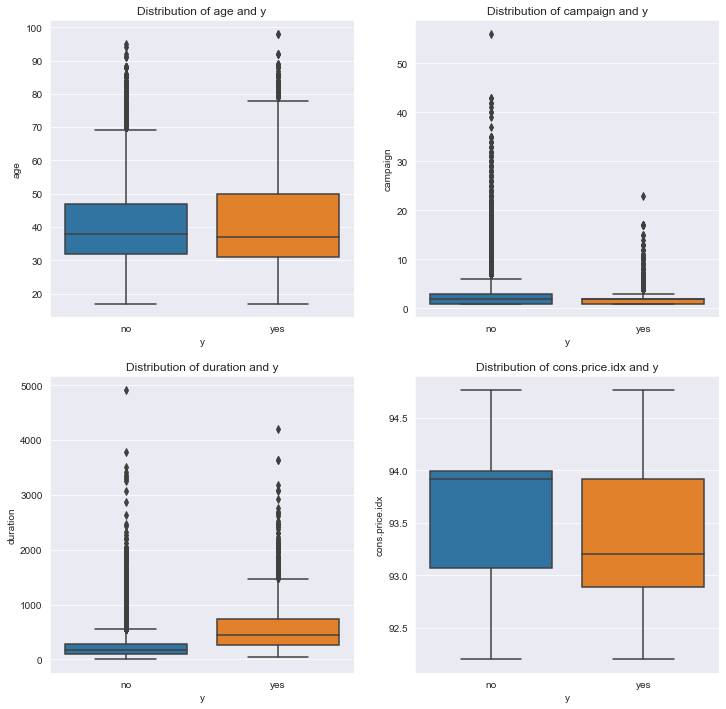

In [19]:
fig, ax=plt.subplots(2,2, figsize=(12,12))
sns.boxplot(x="y", y="age", data=df, ax=ax[0][0])
ax[0][0].set_title("Distribution of age and y")
sns.boxplot(x="y", y="campaign", data=df, ax=ax[0][1])
ax[0][1].set_title("Distribution of campaign and y")
sns.boxplot(x="y", y="duration", data=df, ax=ax[1][0])
ax[1][0].set_title("Distribution of duration and y")
sns.boxplot(x="y", y="cons.price.idx", data=df, ax=ax[1][1])
ax[1][1].set_title("Distribution of cons.price.idx and y");

### previous, emp.car.rate, nr.employed

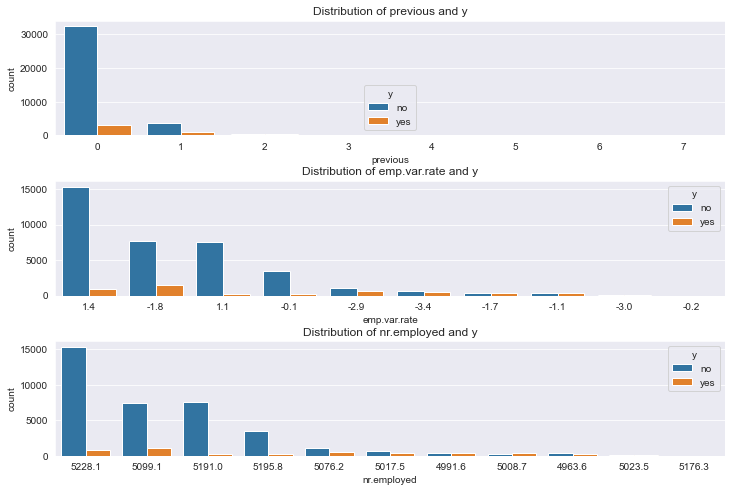

In [20]:
fig, ax= plt.subplots(3,1, figsize=(12,8))
sns.countplot(x="previous", hue="y",data=df, order=df.previous.value_counts().index, ax=ax[0])
ax[0].set_title("Distribution of previous and y")
sns.countplot(x="emp.var.rate", hue="y",data=df, order=df["emp.var.rate"].value_counts().index, ax=ax[1])
ax[1].set_title("Distribution of emp.var.rate and y")
sns.countplot(x="nr.employed", hue="y",data=df, order=df["nr.employed"].value_counts().index, ax=ax[2])
ax[2].set_title("Distribution of nr.employed and y")
plt.subplots_adjust(hspace=0.4);

### previous

In [21]:
df.previous.value_counts()

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

### cons.conf.idx, euribor3m

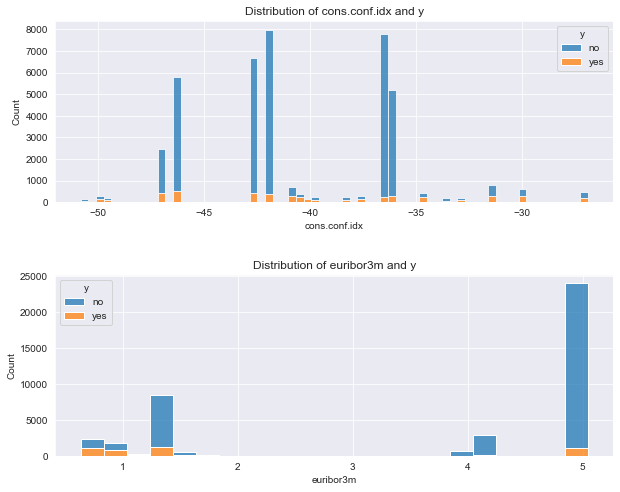

In [22]:
fig, ax=plt.subplots(2,1, figsize=(10,8))
sns.histplot(x="cons.conf.idx", hue="y", multiple="stack", data=df, ax=ax[0])
ax[0].set_title("Distribution of cons.conf.idx and y")
sns.histplot(hue="y", x="euribor3m", multiple="stack", data=df, ax=ax[1])
ax[1].set_title("Distribution of euribor3m and y")
plt.subplots_adjust(hspace=0.4)

### Unknown values in each column

In [23]:
column_names = df.columns.values
unknown_column={}
for key in column_names:
    if sum(df[key]=="unknown")>0:
        unknown_column[key]=round((sum(df[key]=="unknown")/len(df[key]) ) * 100,2)

In [24]:
unknown_column_df = pd.DataFrame(unknown_column, index=["UnknownValuePercent"]).T.sort_values(by="UnknownValuePercent", ascending=False)

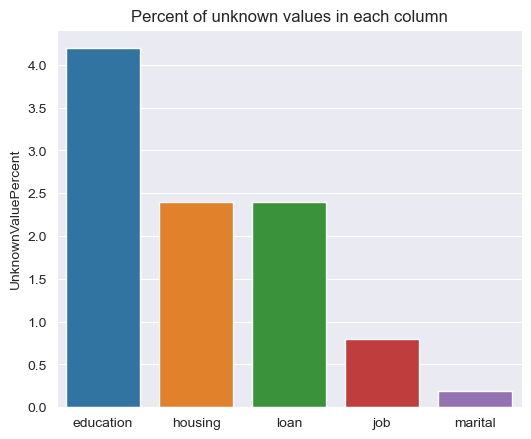

In [25]:
plt.figure(figsize=(6,5), dpi=100)
ax=sns.barplot(y=unknown_column_df["UnknownValuePercent"],x=unknown_column_df.index)
ax.set_title("Percent of unknown values in each column");

### Unkown values in education, housing, loan, job and marital columns are only a small part in each column, we will drop unknown values in these columns and only keep unknown values in default column.

In [26]:
df=df[df["education"]!="unknown"]
df=df[df["housing"]!="unknown"]
df=df[df["loan"]!="unknown"]
df=df[df["job"]!="unknown"]
df=df[df["marital"]!="unknown"]

In [27]:
df.shape

(38234, 21)

In [28]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,other,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### There are only 3 "yes" values in default, and a small part is "unknown", there 2 values are not helpful, we change "yes" and "unknown" into "other" in this column.

In [29]:
df.default.replace("yes", "other", inplace=True)
df.default.replace("unknown", "other", inplace=True)

### There are some conflicts between 2 columns

In [30]:
df=df.loc[~((df["pdays"]==999) & (df["previous"]!=0))]

In [31]:
df.shape

(34421, 21)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34421 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             34421 non-null  int64  
 1   job             34421 non-null  object 
 2   marital         34421 non-null  object 
 3   education       34421 non-null  object 
 4   default         34421 non-null  object 
 5   housing         34421 non-null  object 
 6   loan            34421 non-null  object 
 7   contact         34421 non-null  object 
 8   month           34421 non-null  object 
 9   day_of_week     34421 non-null  object 
 10  duration        34421 non-null  int64  
 11  campaign        34421 non-null  int64  
 12  pdays           34421 non-null  int64  
 13  previous        34421 non-null  int64  
 14  poutcome        34421 non-null  object 
 15  emp.var.rate    34421 non-null  float64
 16  cons.price.idx  34421 non-null  float64
 17  cons.conf.idx   34421 non-null 

## Drop colunms that we think are unrelated to y.

In [33]:
df.drop(columns=["duration", "day_of_week"], inplace=True)

D:\Anaconda\envs\eods-s22\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
df

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,other,no,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


### Delete outliers: age, campaign

In [35]:
age_high = df.age.mean()+3*df.age.std()
age_low = df.age.mean()-3*df.age.std()

In [36]:
df=df[(df.age<age_high) & (df.age > age_low)]

In [37]:
campaign_high = df.campaign.mean()+3*df.campaign.std()
campaign_low = df.campaign.mean()-3*df.campaign.std()

In [38]:
df=df[(df.campaign<campaign_high) & (df.campaign > campaign_low)]

In [39]:
df.shape

(33503, 19)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33503 entries, 0 to 41186
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             33503 non-null  int64  
 1   job             33503 non-null  object 
 2   marital         33503 non-null  object 
 3   education       33503 non-null  object 
 4   default         33503 non-null  object 
 5   housing         33503 non-null  object 
 6   loan            33503 non-null  object 
 7   contact         33503 non-null  object 
 8   month           33503 non-null  object 
 9   campaign        33503 non-null  int64  
 10  pdays           33503 non-null  int64  
 11  previous        33503 non-null  int64  
 12  poutcome        33503 non-null  object 
 13  emp.var.rate    33503 non-null  float64
 14  cons.price.idx  33503 non-null  float64
 15  cons.conf.idx   33503 non-null  float64
 16  euribor3m       33503 non-null  float64
 17  nr.employed     33503 non-null 

### Encode categorical predictors

In [41]:
df = pd.get_dummies(data=df, 
                    columns=["job", "marital", "month", "poutcome"], 
                    prefix=["job", "marital", "month", "poutcome"],
                   drop_first = True)

In [42]:
education_list = ['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree']
default_list = ['no', 'other']
housing_list = ['no', 'yes']
loan_list = ['no', 'yes']
contact_list = ['cellular', 'telephone']

def transfer(column, category, number):
    df.loc[df[column] == category, column] = number        
       
for i in education_list:
        transfer('education', i, education_list.index(i))
        
for i in default_list:
        transfer('default', i, default_list.index(i))
        
for i in housing_list:
        transfer('housing', i, housing_list.index(i))
        
for i in loan_list:
        transfer('loan', i, loan_list.index(i))
        
for i in contact_list:
        transfer('contact', i, contact_list.index(i))

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33503 entries, 0 to 41186
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   33503 non-null  int64  
 1   education             33503 non-null  object 
 2   default               33503 non-null  object 
 3   housing               33503 non-null  object 
 4   loan                  33503 non-null  object 
 5   contact               33503 non-null  object 
 6   campaign              33503 non-null  int64  
 7   pdays                 33503 non-null  int64  
 8   previous              33503 non-null  int64  
 9   emp.var.rate          33503 non-null  float64
 10  cons.price.idx        33503 non-null  float64
 11  cons.conf.idx         33503 non-null  float64
 12  euribor3m             33503 non-null  float64
 13  nr.employed           33503 non-null  float64
 14  y                     33503 non-null  object 
 15  job_blue-collar    

### Train & Test split

In [44]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
y = df.loc[:,'y']
y.loc[y == 'no'] = 0
y.loc[y == 'yes'] = 1
y = y.astype('int')
X = df.drop('y',axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.25, random_state = 123)
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_smote.shape)
print(X_smote.shape)

D:\Anaconda\envs\eods-s22\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(25127, 37)
(8376, 37)
(25127,)
(8376,)
(44800,)
(44800, 37)


### Model fitting

#### Random Forests

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# tune parameter: n_estimators(most influential to Random Forest)
score_list1 = []
#use 5-fold cross-validation
for i in range(0, 250, 10):
    rfc = RandomForestClassifier(n_estimators=i+1, n_jobs = -1, random_state=123)
    score = cross_val_score(rfc, X_smote, y_smote, cv=5).mean()
    score_list1.append(score)
score_max = max(score_list1)
print('Max score￿{}'.format(score_max), 'Number of trees￿{}'.format(score_list1.index(score_max)*10+1))

Max score￿0.9374330357142858 Number of trees￿211


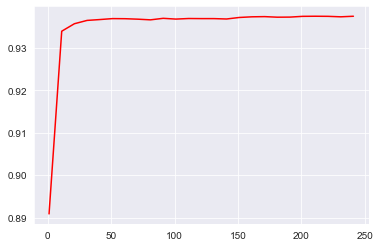

In [51]:
#Plot Learning Curve
x = np.arange(1,251,10)
plt.plot(x, score_list1, 'r-');

In [264]:
#Narrow down the range
score_list2 = []
for i in range(50,70):
    rfc = RandomForestClassifier(n_estimators=i, random_state=90)
    score = cross_val_score(rfc, X_train, y_train, cv=5).mean()
    score_list2.append(score)
score_max = max(score_list2)
print('Max score￿{}'.format(score_max), 'Number of trees￿{}'.format(score_list2.index(score_max)+50))

Max score￿0.8962075654358529 Number of trees￿67


In [216]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': np.arange(50, 71), 'max_depth': np.arange(1, 21)}

GS = GridSearchCV(rfc, param_grid, cv = 5)
GS.fit(X_train, y_train)

best_param = GS.best_params_
best_score = GS.best_score_
print(best_param, best_score)

{'max_depth': 10, 'n_estimators': 53} 0.9052016954622035


In [66]:
#Model accuracy on training set and test set
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth= 20, random_state=123)
rfc = rfc.fit(X_smote, y_smote)
print('Accuracy of Random Forest Classifier on training set: {:.2f}'.format(rfc.score(X_smote, y_smote) * 100))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(rfc.score(X_test, y_test) * 100))

Accuracy of Random Forest Classifier on training set: 97.71
Accuracy of Random Forest Classifier on test set: 89.65


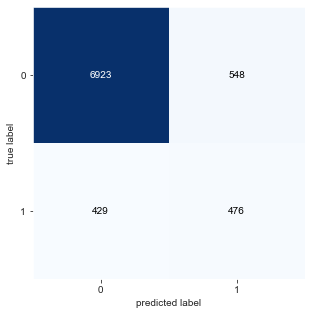

In [53]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix 
from mlxtend.plotting import plot_confusion_matrix

y_test_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

fig,ax = plt.subplots(1,1,figsize=(5,5))
plot_confusion_matrix(cm, axis=ax);

In [54]:
# The precision, recall and F1 score of the model
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision of Random Forest Classifier: {:.2f}'.format(precision_score(y_test, y_test_pred))) #243/(243+137)
print('Recall of Random Forest Classifier: {:.2f}'.format(recall_score(y_test, y_test_pred))) #243/(662+243)
print('F1 score of Random Forest Classifier: {:.2f}'.format(f1_score(y_test, y_test_pred)))

Precision of Random Forest Classifier: 0.46
Recall of Random Forest Classifier: 0.53
F1 score of Random Forest Classifier: 0.49


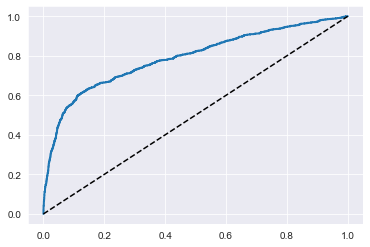

0.7903455793340142

In [55]:
# The ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#from sklearn.model_selection import cross_val_score

y_test_pred_prob = rfc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob[:,1])

def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    [...]
    
plot_roc_curve(fpr, tpr)
plt.show()

#print(cross_val_score(rfc, X_test, y_test, cv=5, scoring='roc_auc').mean())
roc_auc_score(y_test, y_test_pred_prob[:,1])

In [298]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))
print('Accuracy: {:.4f}'.format(rfc.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7471
           1       0.65      0.27      0.38       905

    accuracy                           0.91      8376
   macro avg       0.79      0.63      0.67      8376
weighted avg       0.89      0.91      0.89      8376

Accuracy: 0.9057
